# Overview of Produce Yield Dataset Analysis

In this analysis, we delve into a dataset containing information about produce yields across different areas over several years. The dataset comprises the following columns:

- **Area**: The geographical area where the produce was cultivated.
- **Item**: The type of produce.
- **Year**: The year of cultivation.
- **hg/ha_yield**: The yield of the produce in hectograms per hectare.
- **average_rain_fall_mm_per_year**: The average annual rainfall in millimeters.
- **pesticides_tonnes**: The amount of pesticides used in tonnes.
- **avg_temp**: The average temperature during cultivation in Celsius.

We aim to derive insights and patterns from this dataset to better understand factors influencing produce yield and agricultural productivity.

## Insights and Visualizations

1. **Area Comparison**: 
   - How do different areas compare in terms of produce yield?

2. **Yearly Yield Trend**:
   - How does produce yield vary over the years?

3. **Rainfall vs. Yield**:
   - Is there any correlation between average rainfall and produce yield?

4. **Impact of Pesticides**:
   - How does pesticide usage affect produce yield?

5. **Temperature vs. Yield**:
   - How does average temperature relate to produce yield?

6. **Highest Yield Year**:
   - Which year had the highest overall produce yield?

7. **Item-wise Yield Comparison**:
   - How does produce yield compare between different produce items?

8. **Regional Rainfall Distribution**:
   - How does average rainfall vary across different areas?

9. **Pesticide Usage Trend**:
   - How does pesticide usage vary over the years?

10. **Temperature vs. Pesticide Usage**:
    - Is there a correlation between average temperature and pesticide usage?

By exploring these insights, we gain valuable information about the interplay between environmental factors, agricultural practices, and produce yield, which can inform decision-making in farming and resource management.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [3]:
df = pd.read_csv("yield_df.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [7]:
df.shape

(28242, 8)

In [11]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [13]:
#to drop off the column not needed
df . drop (columns = ["Unnamed: 0"])

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [15]:
df . isnull(). sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [17]:
print(df.dtypes)

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None


### How do different areas compare in terms of produce yield?

Average Produce Yield by Area:
Area
Botswana                      7353.921875
Eritrea                      18155.200000
Central African Republic     26432.465839
Mauritania                   27738.142857
Burkina Faso                 33061.614130
                                ...      
Ireland                     197913.695652
Netherlands                 204151.202899
Denmark                     214033.020000
Belgium                     216468.461538
United Kingdom              240956.478261
Name: hg/ha_yield, Length: 101, dtype: float64


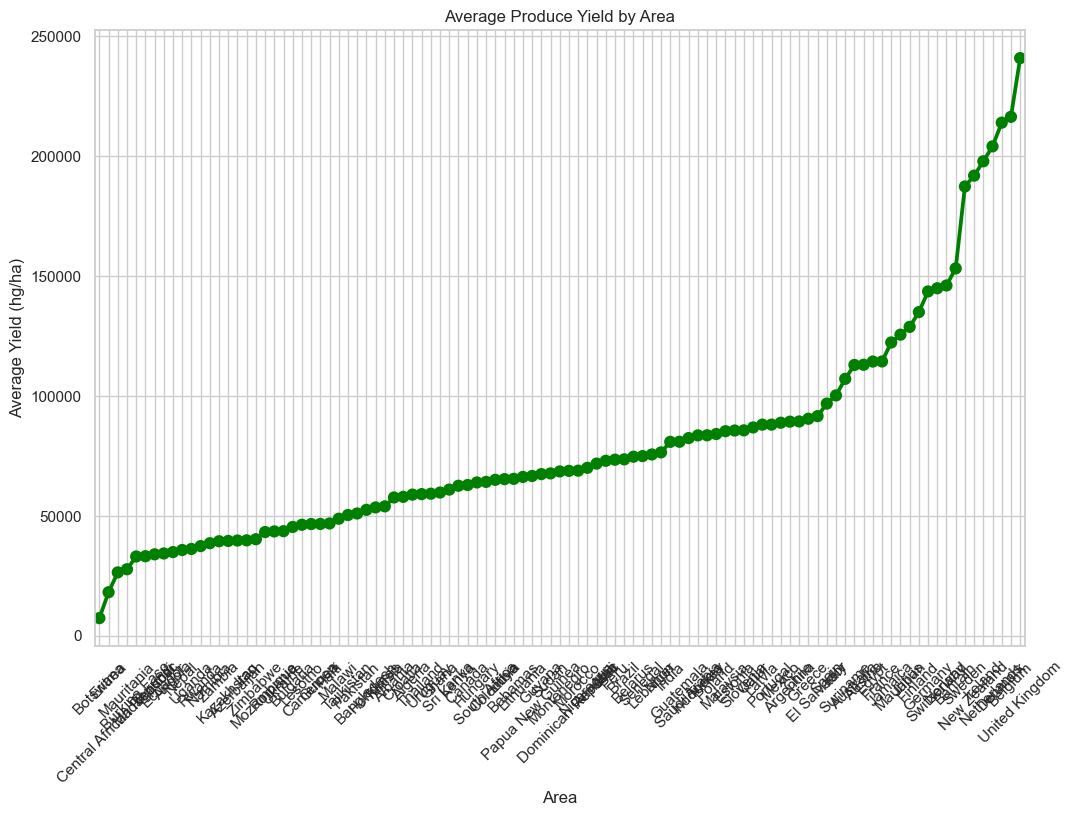

In [33]:
# Calculate mean yield for each area
area_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values()

# Print findings
print("Average Produce Yield by Area:")
print(area_yield)

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Area and calculate mean yield
area_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
sns.pointplot(x=area_yield.index, y=area_yield.values, color='green')
plt.title('Average Produce Yield by Area')
plt.xlabel('Area')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability
plt.show()

### . How does produce yield vary over the years?

Produce Yield Variation Over Years:
Year
1990    66447.152921
1991    66318.520619
1992    66915.770304
1993    67480.347506
1994    68516.765766
1995    69524.089198
1996    69889.091653
1997    71160.405229
1998    71476.467320
1999    73896.170891
2000    75376.052033
2001    76587.048007
2002    77730.135993
2004    80590.019449
2005    80702.022672
2006    80386.269509
2007    82532.894525
2008    84344.385048
2009    85350.016908
2010    86512.526104
2011    88908.335743
2012    88569.850794
2013    90357.363781
Name: hg/ha_yield, dtype: float64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


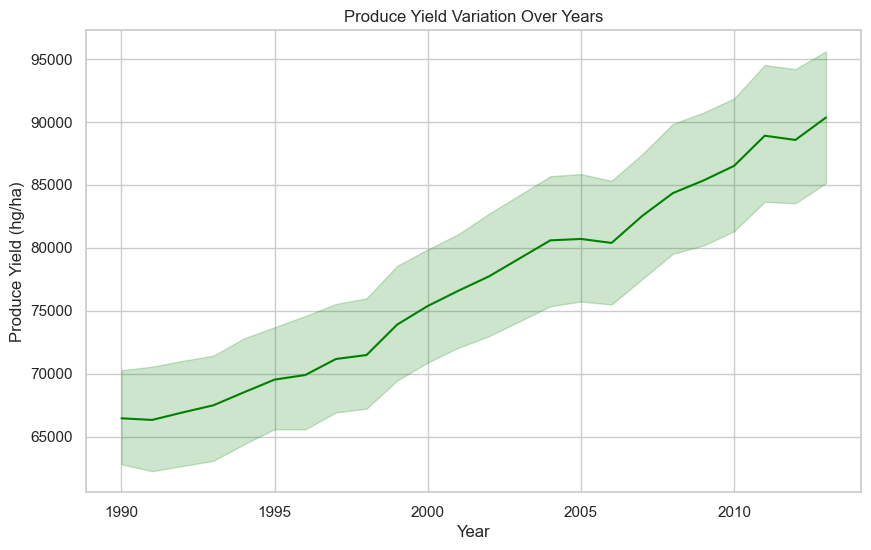

In [64]:
# Calculate mean yield for each year
yearly_yield = df.groupby('Year')['hg/ha_yield'].mean()

# Print findings
print("Produce Yield Variation Over Years:")
print(yearly_yield)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='hg/ha_yield', color='green')
plt.title('Produce Yield Variation Over Years')
plt.xlabel('Year')
plt.ylabel('Produce Yield (hg/ha)')
plt.show()

###  Is there any correlation between average rainfall and produce yield?

Correlation Between Rainfall and Produce Yield: 0.0009621544715998689


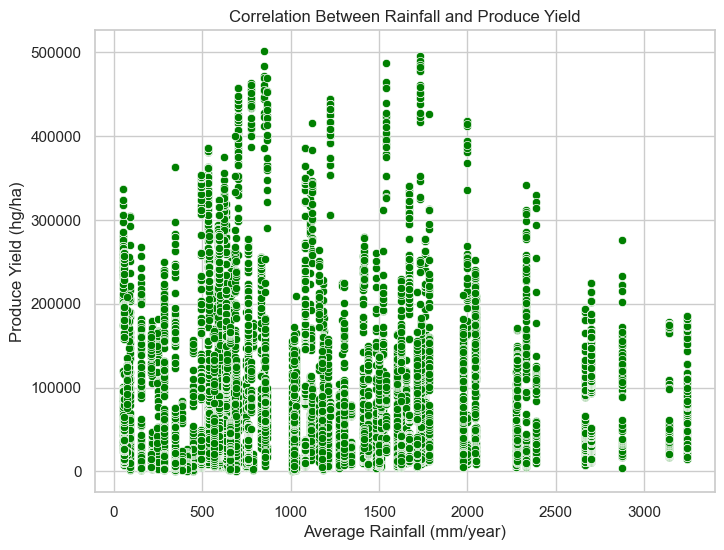

In [66]:
# Calculate correlation between rainfall and yield
correlation_rain_yield = df['average_rain_fall_mm_per_year'].corr(df['hg/ha_yield'])

# Print findings
print("Correlation Between Rainfall and Produce Yield:", correlation_rain_yield)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', color='green')
plt.title('Correlation Between Rainfall and Produce Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Produce Yield (hg/ha)')
plt.show()

### How does pesticide usage affect produce yield?

Correlation Between Pesticide Usage and Produce Yield: 0.06408508765267705


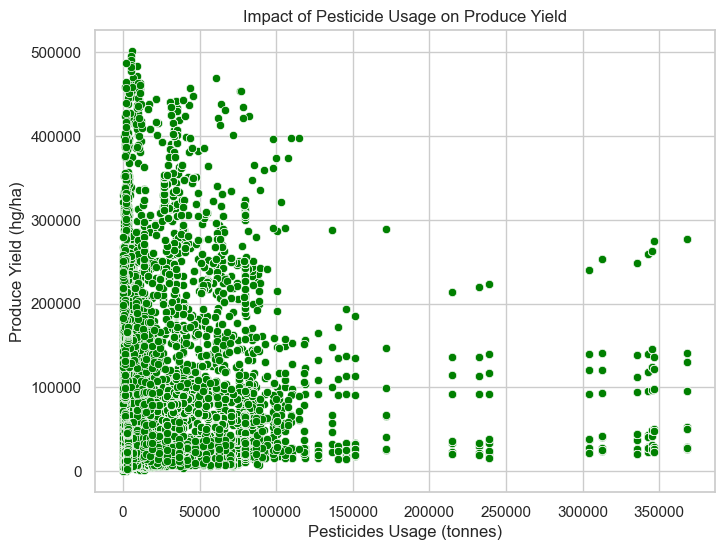

In [68]:
# Calculate correlation between pesticide usage and yield
correlation_pesticide_yield = df['pesticides_tonnes'].corr(df['hg/ha_yield'])

# Print findings
print("Correlation Between Pesticide Usage and Produce Yield:", correlation_pesticide_yield)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield', color='green')
plt.title('Impact of Pesticide Usage on Produce Yield')
plt.xlabel('Pesticides Usage (tonnes)')
plt.ylabel('Produce Yield (hg/ha)')
plt.show()

### How does average temperature relate to produce yield?

Correlation Between Temperature and Produce Yield: -0.11477695959121151


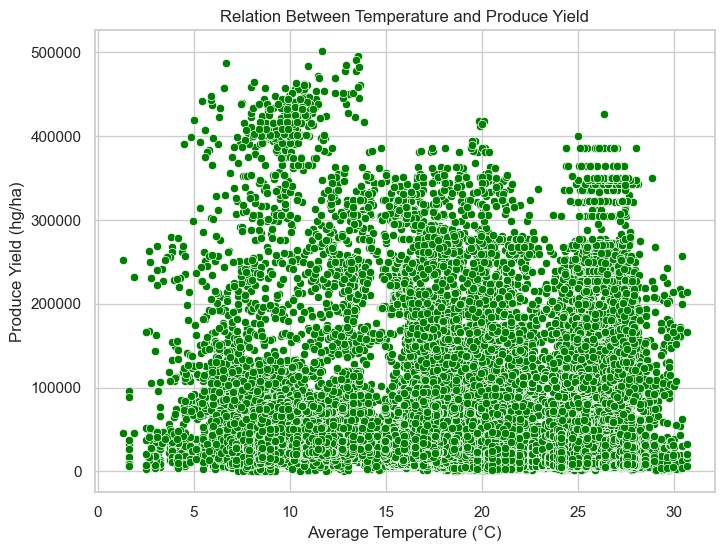

In [70]:
# Calculate correlation between temperature and yield
correlation_temp_yield = df['avg_temp'].corr(df['hg/ha_yield'])

# Print findings
print("Correlation Between Temperature and Produce Yield:", correlation_temp_yield)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_temp', y='hg/ha_yield', color='green')
plt.title('Relation Between Temperature and Produce Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Produce Yield (hg/ha)')
plt.show()

### Which year had the highest overall produce yield?

Year with Highest Produce Yield: 2013


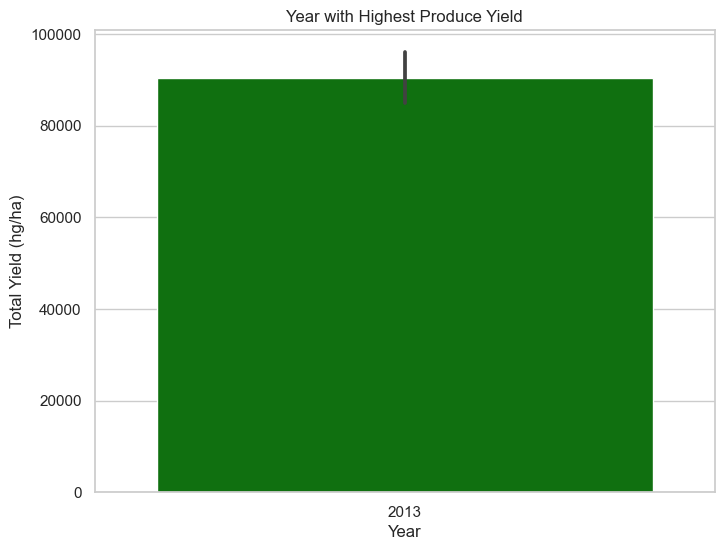

In [72]:
# Find year with highest overall yield
max_yield_year = df.groupby('Year')['hg/ha_yield'].sum().idxmax()

# Print findings
print("Year with Highest Produce Yield:", max_yield_year)

# Find year with highest overall yield
max_yield_year = df.groupby('Year')['hg/ha_yield'].sum().idxmax()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='hg/ha_yield', data=df[df['Year'] == max_yield_year], color='green')
plt.title('Year with Highest Produce Yield')
plt.xlabel('Year')
plt.ylabel('Total Yield (hg/ha)')
plt.show()

### How does produce yield compare between different produce items?

Average Produce Yield by Item:
Item
Soybeans                 16731.092771
Sorghum                  18635.777229
Wheat                    30116.267825
Maize                    36310.070614
Rice, paddy              40730.434770
Plantains and others    106041.320144
Yams                    114140.345927
Sweet potatoes          119057.793772
Cassava                 150479.466993
Potatoes                199801.549579
Name: hg/ha_yield, dtype: float64


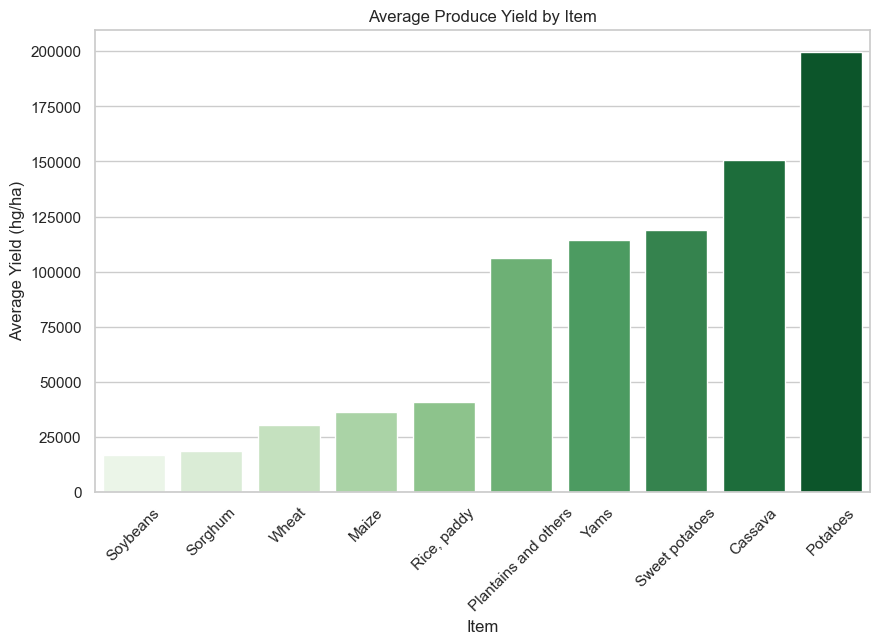

In [74]:
# Calculate mean yield for each produce item
item_yield = df.groupby('Item')['hg/ha_yield'].mean().sort_values()

# Print findings
print("Average Produce Yield by Item:")
print(item_yield)

# Group data by Item and calculate mean yield
item_yield = df.groupby('Item')['hg/ha_yield'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=item_yield.index, y=item_yield.values, palette='Greens')
plt.title('Average Produce Yield by Item')
plt.xlabel('Item')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45)
plt.show()

### How does average rainfall vary across different areas?

In [ ]:
# Print findings
print("Distribution of Average Rainfall by Area:")
print(df.groupby('Area')['average_rain_fall_mm_per_year'].describe())


# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Area', y='average_rain_fall_mm_per_year', palette='Greens')
plt.title('Distribution of Average Rainfall by Area')
plt.xlabel('Area')
plt.ylabel('Average Rainfall (mm/year)')
plt.xticks(rotation=45)
plt.show()


###  How does pesticide usage vary over the years?

Pesticide Usage Variation Over Years:
Year
1990    32854849.99
1991    32797319.01
1992    33837494.13
1993    33986466.87
1994    33792967.00
1995    35266238.84
1996    36209022.78
1997    37691844.10
1998    39148511.68
1999    39475841.56
2000    41074386.48
2001    40374444.13
2002    38023171.88
2004    45958242.57
2005    49212567.54
2006    49151061.40
2007    55893759.95
2008    54234529.58
2009    57806384.04
2010    62223272.13
2011    65659418.53
2012    65991811.55
2013    66462467.94
Name: pesticides_tonnes, dtype: float64


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


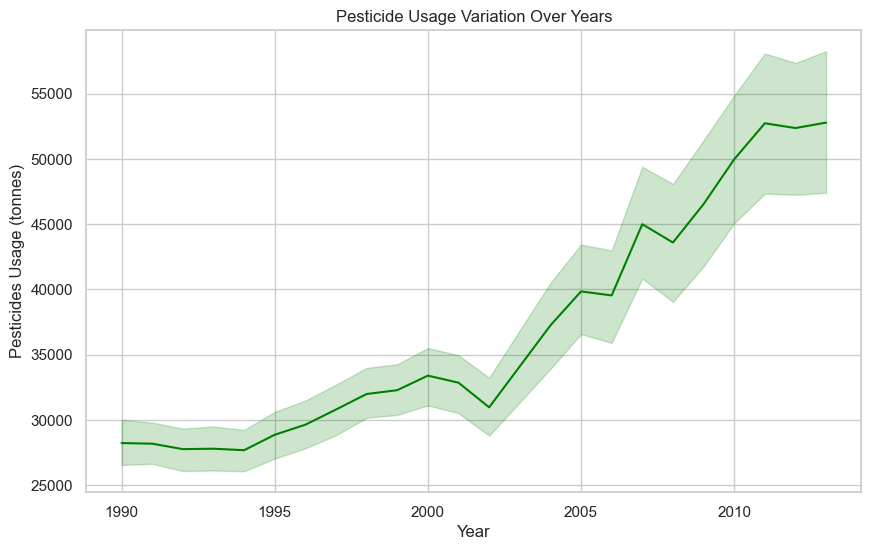

In [78]:
# Print findings
print("Pesticide Usage Variation Over Years:")
print(df.groupby('Year')['pesticides_tonnes'].sum())

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='pesticides_tonnes', color='green')
plt.title('Pesticide Usage Variation Over Years')
plt.xlabel('Year')
plt.ylabel('Pesticides Usage (tonnes)')
plt.show()

### Is there a correlation between average temperature and pesticide usage?

Correlation Between Temperature and Pesticide Usage: 0.030946109649350757


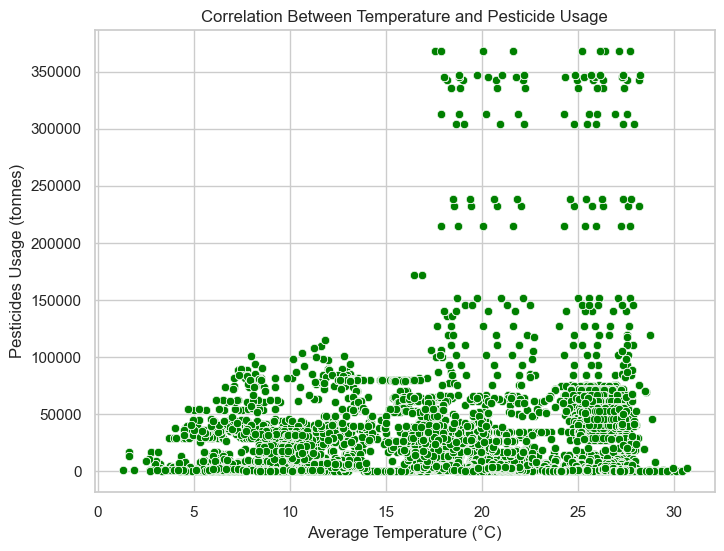

In [80]:
# Calculate correlation between temperature and pesticide usage
correlation_temp_pesticide = df['avg_temp'].corr(df['pesticides_tonnes'])

# Print findings
print("Correlation Between Temperature and Pesticide Usage:", correlation_temp_pesticide)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_temp', y='pesticides_tonnes', color='green')
plt.title('Correlation Between Temperature and Pesticide Usage')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Pesticides Usage (tonnes)')
plt.show()